<div style="padding-right: 2em">
<br>
<span><small>Hult International Business School</small></span>
<span style="margin-left: 17%"><small>Machine Learning, Business Analytics</small></span>
<span style="float: right"><small>Team 14&nbsp; Spring 2021</small></span>
<hr style="color: black; display: block; height: 1px; border: ; margin-bottom: 1.5em; margin-top: .3em">
    
<h4 style="margin-top: 2em">Unsupervised Learning Team Project</h4>
<center>
    <h2 style="margin-top: 1.5em; color: #000">The Psychological Underpinnings Behind Computer Marketing</h2>
    <div style="margin: 2.3em 4em 0 0">
        <b>Team Fourteen of Machine Learning</b>
        <div style="margin: .5em 0 .8em 0">
            Ammar Abu Alhayja,
            Maximiliana Barollo,
            <br>Noe Urbina Salazar,
            Dachao Sun,
            Chowdhury Tabassum
        </div>
        January 31, 2021
        <br><br>
        <img src="./fig/hult_icon.png" width="50" /><br>
    </div>
</center>

</div>

In [ ]:
### Psychological Underpinnings Behind Computer Marketing###

<div style="margin: .5em 0 1em 0; padding-right: 2em;">
    
<h3>1&nbsp;&nbsp; Introduction</h3>


<p style="text-align: justify; margin-bottom: .5em">
It has long been a question pondered by fans of desktop and laptop computers, that which among the popular brands and operating system types should they choose to buy, given that new products and updates come up nearly yearly.  There are too many factors to balance with while making the decision, sometimes a hard one. As data analysts, however, this is the moment for exploring the secret ingredients behind this market by looking at data that characterize the customers.
</p>

<center>
    <img src="./fig/the-big-five-personality-dimensions.gif" width="30%" />
    <center><div style="margin-top: .8em"><small>Fig.&nbsp;1&nbsp;&nbsp; Personality traits in social setting
        (credit: <em>verywellmind.com</em>)</small></div>
<br></center>
    
<p style="text-align: justify; margin-top: -.5em">The case began when Apple, the modern computer giant company, recently planed to tackle this question by leveraging the famous Big Five personality traits (BFPT)<sup>&nbsp;[<a href="#bigfive">1</a>]</sup> and the Hult DNA. Fig.&nbsp;1 shows an animated setting of social interactions between people with different traits.</p>
    
<p style="text-align: justify">Now the laptop giant <em>Apple</em> is looking for Hult analysts to analyze these factors and provide any insights discovered along the way.  We as an analytical team are in this way commissioned to conduct a detailed analysis for a deliverable in <em>Jupyter Notebook</em>. Details such as the audience size can be of concern as well as external domain research references.
</p>


</div>

In [2]:
import pandas as pd

df = pd.read_excel("./datasets/survey_data.xlsx") # load data
df_begin = df.copy()                         # make hard copy

print("[There are", len(df.columns), "columns.]")
print("[There are", sum(1 * (1 != df.columns.value_counts())), "duplicates.]")

# print columns: "Big Five" and "Hult DNA"
for item in df.columns:
    #continue
    if "surveyID" == item: continue
    if "Am the life of the party" == item:
        print("\n\033[1mThe Big Five Personality Test (BFPT):\033[0;0m", end="   ")
    print(item + ",  ", end="")
    if "Am full of ideas" == item:
        print("\n\n\033[1mOthers:\033[0;0m", end="  ")

[There are 79 columns.]
[There are 0 duplicates.]

The Big Five Personality Test (BFPT):   Am the life of the party,  Feel little concern for others,  Am always prepared,  Get stressed out easily,  Have a rich vocabulary,  Don't talk a lot,  Am interested in people,  Leave my belongings around,  Am relaxed most of the time,  Have difficulty understanding abstract ideas,  Feel comfortable around people,  Insult people,  Pay attention to details,  Worry about things,  Have a vivid imagination,  Keep in the background,  Sympathize with others' feelings,  Make a mess of things,  Seldom feel blue,  Am not interested in abstract ideas,  Start conversations,  Am not interested in other people's problems,  Get chores done right away,  Am easily disturbed,  Have excellent ideas,  Have little to say,  Have a soft heart,  Often forget to put things back in their proper place,  Get upset easily,  Do not have a good imagination,  Talk to a lot of different people at parties,  Am not really interest

<div style="margin: .5em 0 1em 0; padding-right: 2em;">
    
<p style="text-align: justify">
Examining the basic information of the dataset, we found that columns 2&mdash;51 are the <b>50 survey questions adopted from "Big Five Personality Traits"</b> for computing the trait scores subsequently; columns 52&mdash;79 are the relelated "Hult DNA" attributes with a few <em>demographic information</em> questions. Next, we will perform a detailed examination on the data, and decide/create features that will ultimately be used in unsupervised learning algorithms to come.
</p>




</div>

<div style="margin: 1em 0 0em 0; padding-right: 2em;">
<h3>2&nbsp;&nbsp; Data Preparation</h3>
    
<h4>2.0&nbsp;&nbsp; Missing Values</h4>
<p style="text-align: justify">
    We begin by checking the presence of any missing values:
</p>
</div>

In [3]:
print(df.isnull().sum(axis=0).head())
if 0 == \
    df.isnull().sum(axis=0).sum():
    print("[No missing value. Done.]")

surveyID                          0
Am the life of the party          0
Feel little concern for others    0
Am always prepared                0
Get stressed out easily           0
dtype: int64
[No missing value. Done.]


<div style="margin: 0em 0 0em 0; padding-right: 2em;">
    
<h4>2.1&nbsp;&nbsp; Demographic Variables</h4>
<p style="text-align: justify">
    Among the remaining columns beyond the 50 personality questions, there are demographic information as:
    <ul style="margin-top: .5em">
        <li>What program are you in?</li>
        <li>What is your age?</li>
        <li>Gender</li>
        <li>What is your nationality?</li>
        <li>What is your ethnicity?</li>
    </ul>
    
for which we <b>keep the one for "nationality"</b> because we like to take into consideration of the fact that computer products have <b>localized features</b> across different areas in the globe, and drop the others for they would bias the model.
</p>



</div>

In [4]:
columns_to_drop = ["surveyID", "What program are you in?", "What is your age?",
                   "Gender", "What is your ethnicity?"] # columns to-drop
df = df_begin.copy()                                    # start with original
df = df.drop(columns_to_drop, axis=1)                   # drop them
print("[Now (after drop) with", len(df.columns), "columns.]")

[Now (after drop) with 74 columns.]


<div style="margin: 0em 0 0em 0; padding-right: 2em;">
<h4>2.2&nbsp;&nbsp; Feature Engineering:&nbsp; Recoding "Big Five" Personality Traits</h4>

<p style="text-align: justify">Among all variables, two are considered the "response" variables which we are
    <ul>
        <li>"What laptop do you currently have?", and</li> 
        <li>"What laptop would you buy in next assuming if all laptops cost the same?"</li>
    </ul>
</p>    
<p style="text-align: justify">
    According to the research design by Goldberg<sup>&nbsp;[<a href="#bigfive">1</a>]</sup> there are five principle personality traits on which the 50 survey questions are based:
    <ol style="margin-top: .5em">
        <li>Extroversion (E);</li>
        <li>Agreeableness (A);</li>
        <li>Conscientiousness (C);</li>
        <li>Neuroticism (N);</li>
        <li>Openness to Experience (O).</li>
    </ol>
Each of the traits has a specific definition, and a formula to establish it based on the survey questions' scroes<sup>&nbsp;[<a href="#BFPT">3</a>]</sup>, as follows:
    <br>
    <br>
    $$
        E ~~=~~ 20 ~+~ (1) - (6) + (11) - (16) + (21) - (26) + (31) - (36) + (41) - (46)~~ \\
        A ~~=~~ 14 ~-~ (2) + (7) - (12) + (17) - (22) + (27) - (32) + (37) + (42) + (47)~~ \\
        C ~~=~~ 14 ~+~ (3) - (8) + (13) - (18) + (23) - (28) + (33) - (38) + (43) + (48)~~ \\
        N ~~=~~ 38 ~-~ (4) + (9) - (14) + (19) - (24) - (29) - (34) - (39) - (44) - (49)~~ \\
        ~~O ~~=~~ ~8 ~+~ (5) - (10) + (15) - (20) + (25) - (30) + (35) + (40) + (45) + (50)~~~
    $$
<br>where the number inside each parentheses pair, "($i$)", denotes the <b>corresponding score of the $i$-th question</b> in the survey, for a given customer's response.
</p>
<p style="text-align: justify">We then compute, for each observation (i.e. the entire dataset), the five scores Extroversion (E), Agreeableness (A), Conscientiousness (C), Neuroticism (N), and Openness to Experience (O). Once all is computed, we <b>copy it into a seperate dataframe</b> with the five features.</p>
</div>

In [5]:
# implement new columns for "Big Five"
# according to the designated formulas
#

columns_bigfive = ["Extroversion",
                   "Agreeableness",
                   "Conscientiousness",
                   "Neuroticism",
                   "Openness"]

df[columns_bigfive[0]] = 20 + df.iloc[:, 1] - df.iloc[:, 6] + df.iloc[:, 11] \
                            - df.iloc[:, 16] + df.iloc[:, 21] - df.iloc[:, 26] \
                            + df.iloc[:, 31] - df.iloc[:, 36] + df.iloc[:, 41] - df.iloc[:, 46]
df[columns_bigfive[1]] = 14 - df.iloc[:, 2] + df.iloc[:, 7] - df.iloc[:, 12] \
                            + df.iloc[:, 17] - df.iloc[:, 22] + df.iloc[:, 27] \
                            - df.iloc[:, 32] + df.iloc[:, 37] + df.iloc[:, 42] + df.iloc[:, 47]
df[columns_bigfive[2]] = 14 + df.iloc[:, 3] - df.iloc[:, 8] + df.iloc[:, 13] \
                            - df.iloc[:, 18] + df.iloc[:, 23] - df.iloc[:, 28] \
                            + df.iloc[:, 33] - df.iloc[:, 38] + df.iloc[:, 43] + df.iloc[:, 48]
df[columns_bigfive[3]] = 38 - df.iloc[:, 4] + df.iloc[:, 9] - df.iloc[:, 14] \
                            + df.iloc[:, 19] - df.iloc[:, 24] - df.iloc[:, 29] \
                        - df.iloc[:, 34] - df.iloc[:, 39] - df.iloc[:, 44] - df.iloc[:, 49]
df[columns_bigfive[4]] =  8 + df.iloc[:, 5] - df.iloc[:, 10] + df.iloc[:, 15] \
                            - df.iloc[:, 20] + df.iloc[:, 25] - df.iloc[:, 30] \
                            + df.iloc[:, 35] + df.iloc[:, 40] + df.iloc[:, 45] + df.iloc[:, 50]

# new dataframe for "Big Five" (137-by-5)
df_bigfive = df.copy().loc[:, columns_bigfive]

<div style="margin: 1em 0 1em 0; padding-right: 2em;">
<h4>2.3&nbsp;&nbsp; Hult DNA</h4>
<p style="text-align: justify">
    The <em>Hult DNA</em> is a notion for a collection of characters invented by Hult International Business School (<a href="www.hult.edu" style="color: #000">www.hult.edu</a>) which fosters leadership, teamwork, and personal growth. These personality attributes are demonstrated in questions in the dataset at columns 52&mdash;79. Excluding some demographic information and the two "response" variables, we <b>subset Hult DNA columns</b> into another <b>new dataframe</b>, and, for convenience, <b>include "Nationality" into this dataframe</b> to experiment with as well:
</p>
</div>

In [6]:
columns_hultdna = [
   "See underlying patterns in complex situations",
   "Don't  generate ideas that are new and different",
   "Demonstrate an awareness of personal strengths and limitations",
   "Display a growth mindset",
   "Respond effectively to multiple priorities",
   "Take initiative even when circumstances, objectives, or rules aren't clear",
   "Encourage direct and open discussions",
   "Respond effectively to multiple priorities.1",
   "Take initiative even when circumstances, objectives, or rules aren't clear.1",
   "Encourage direct and open discussions.1",
   "Listen carefully to others",
   "Don't persuasively sell a vision or idea",
   "Build cooperative relationships",
   "Work well with people from diverse cultural backgrounds",
   "Effectively negotiate interests, resources, and roles",
   "Can't rally people on the team around a common goal",
   "Translate ideas into plans that are organized and realistic",
   "Resolve conflicts constructively",
   "Seek and use feedback from teammates",
   "Coach teammates for performance and growth",
   "Drive for results",
   "What is your nationality? "]

# new dataframe for "Hult DNA" (137-by-22)
#
df_hultdna = df.copy()  # start with a copy
df_hultdna = df_hultdna.loc[:, columns_hultdna]

# re-code "nationality" (lower-cased first)
#
for j in range(len(df_hultdna["What is your nationality? "])):
    df_hultdna.loc[j, "What is your nationality? "] = \
        df_hultdna.loc[j, "What is your nationality? "].lower() # lower-case
    
codes, uniques = pd.factorize(df_hultdna["What is your nationality? "])
df_hultdna["What is your nationality? "] = codes  # add new column
uniques_nationality = uniques                     # save it for later good

<div style="margin: 2em 0 0em 0; padding-right: 2em;">
<h4>2.4&nbsp;&nbsp; Standardization</h4>
<p style="text-align: justify">
    To prepare for further computations, the data variables are to be scaled to the same standardized range, as as <b>standard score</b>. Specifically, the standard score of a sample $x$ is:
$$
z ~~=~~ \dfrac{(x - u)}{s}
$$

such that each variable (column) will have zero mean and one unit of variance. We leverage the <em>StandardScaler()</em> model object in scikit-learn to achive so:
</p>

</div>

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# standardize "big five" dataframe
#
saved_columns = df_bigfive.columns        # save cols
scaler = StandardScaler()
scaler.fit(df_bigfive)                    # fit data
df_bigfive = scaler.transform(df_bigfive) # transform
df_bigfive = pd.DataFrame(df_bigfive)
df_bigfive.columns = saved_columns        # re-attach
print("(Big Five)")
print("\033[1mVariance:\033[0;0m\n"+str(np.var(df_bigfive)))
print("\033[1mMean:\033[0;0m\n"+str(np.mean(df_bigfive))+"\n")

# standardize "Hult DNA" dataframe
#
saved_columns = df_hultdna.columns        # save cols
scaler = StandardScaler()
scaler.fit(df_hultdna)                    # fit data
df_hultdna = scaler.transform(df_hultdna) # transform
df_hultdna = pd.DataFrame(df_hultdna)
df_hultdna.columns = saved_columns        # re-attach
print("(Hult DNA)")
print("\033[1mVariance:\033[0;0m\n"+str(np.var(df_hultdna)))
print("\033[1mMean:\033[0;0m\n"+str(np.mean(df_hultdna))+"\n")

(Big Five)
Variance:
Extroversion         1.0
Agreeableness        1.0
Conscientiousness    1.0
Neuroticism          1.0
Openness             1.0
dtype: float64
Mean:
Extroversion         1.199365e-16
Agreeableness        3.095658e-16
Conscientiousness   -1.661283e-16
Neuroticism          1.709906e-16
Openness             2.204238e-16
dtype: float64

(Hult DNA)
Variance:
See underlying patterns in complex situations                                   1.0
Don't  generate ideas that are new and different                                1.0
Demonstrate an awareness of personal strengths and limitations                  1.0
Display a growth mindset                                                        1.0
Respond effectively to multiple priorities                                      1.0
Take initiative even when circumstances, objectives, or rules aren't clear      1.0
Encourage direct and open discussions                                           1.0
Respond effectively to multiple priori

<div style="margin: 2em 0 0em 0; padding-right: 2em;">
<h4>2.5&nbsp;&nbsp; Append "Response" Variables</h4>
<p style="text-align: justify">
    We want to <b>append</b> the two-columns "response" variables, "<u>What laptop do you currently have?</u>" and
    "<u>What laptop would you buy in next assuming if all laptops cost the same?</u>", to both <em><b>df_bigfive</b></em> and <em><b>df_hultdna</b></em> respectively,&mdash;after re-coding them into integer labels:
    <ul>
        <li>"<b>1</b>" corresponds to "<b>Macbook</b>",</li>
        <li>"<b>2</b>" corresponds to "<b>Windows laptop</b>", and</li>
        <li>"<b>3</b>" corresponds to "<b>Chromebook</b>".</li>
    </ul>
</p>
</div>

In [8]:
# convert or encode based on:
#   "1" -- Macbook
#   "2" -- Windows laptop
#   "3" -- Chromebook

columns_response = ["What laptop do you currently have?",
                    "What laptop would you buy in next assuming if all laptops cost the same?"]

for col in columns_response:
    codes, uniques = pd.factorize(df[col])
    # plus 1 such that [0, 1, 2] becomes [1, 2, 3]
    df[col] = 1 + codes
    print("Labels for \""+col+"\":\n\t"+str(np.unique(df[col])))

# append re-coded responses
for col in columns_response:
    df_bigfive[col] = df[col] # append
    df_hultdna[col] = df[col] # append
print("Dimension \"df_bigfive\":", df_bigfive.shape)
print("Dimension \"df_hultdna\":", df_hultdna.shape)

Labels for "What laptop do you currently have?":
	[1 2]
Labels for "What laptop would you buy in next assuming if all laptops cost the same?":
	[1 2 3]
Dimension "df_bigfive": (137, 7)
Dimension "df_hultdna": (137, 24)


<div style="margin: 1em 0 0em 0; padding-right: 2em;">
    <h4><u>2.6&nbsp;&nbsp; Subsetting Current Apple Users</u></h4>
<p style="text-align: justify">
    To focus on exploring characteristics of those who currently own an Apple Makbook, we subset the dataset for observations which have this attribute:
</p>
</div>

In [9]:
backup_df_bigfive = df_bigfive.copy()
backup_df_bigfive = df_hultdna.copy()

# do something to subset:
# 1 - Macbook, 2 - Windows laptop
# 3 - Chromebook
#
key = "What laptop do you currently have?"
df_bigfive = df_bigfive.loc[:, :][1 == df_bigfive.loc[:, key]]
df_hultdna = df_hultdna.loc[:, :][1 == df_hultdna.loc[:, key]]

print("[After \"bigfive\" subsetting", df_bigfive.shape[0], "observations.]")
print("[After \"hultdna\" subsetting", df_hultdna.shape[0], "observations.]")

[After "bigfive" subsetting 69 observations.]
[After "hultdna" subsetting 69 observations.]


<div style="margin: 3em 0 0em 0; padding-right: 2em;">
<h3>3&nbsp;&nbsp; Analysis:&nbsp; Correlation, Feature Extration with PCA, and Interpretations</span></h3>
</div>

<div style="margin: 0em 0 0em 0; padding-right: 2em;">
        
<h4 style="color: ">3.1&nbsp;&nbsp; Correlation on "Big Five"</h4>
<p style="text-align: justify">
    One way to begin an analysis is to observe the <i>correlation matrix</i> of the data, here for the "Big Five" columns and two responses:
</p>
</div>

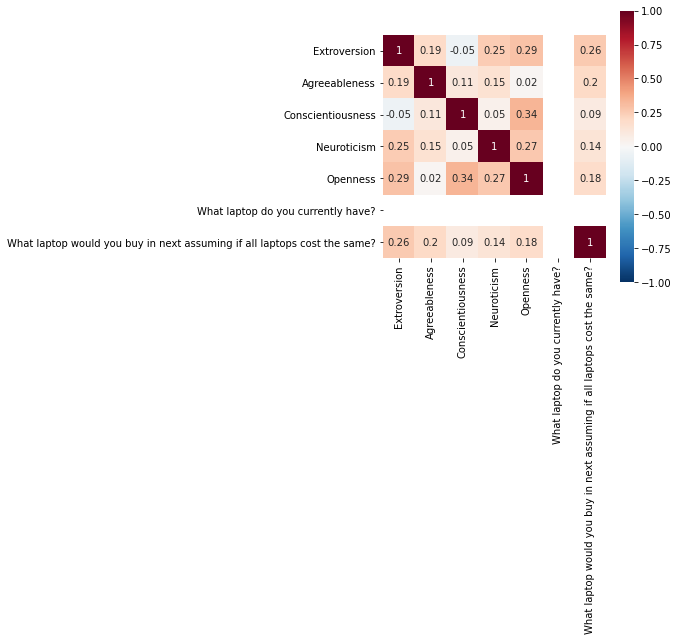

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation heatmap for "Big Five"
fig, ax = plt.subplots(figsize=(5, 5))

df_bigfive_corr = \
    df_bigfive.corr(method="pearson").round(2)

sns.heatmap(data=df_bigfive_corr,
            cmap='RdBu_r',
            vmin=-1.0, vmax=1.0,
            square=True, annot=True)
plt.show()

<div style="margin: 1.5em 0 0em 0; padding-right: 2em;">
    
<h4 style="color: ">3.2&nbsp;&nbsp; Correlation on "Hult DNA"</h4>
<p style="text-align: justify">
    <em>Here it goes.</em>
</p>
</div>

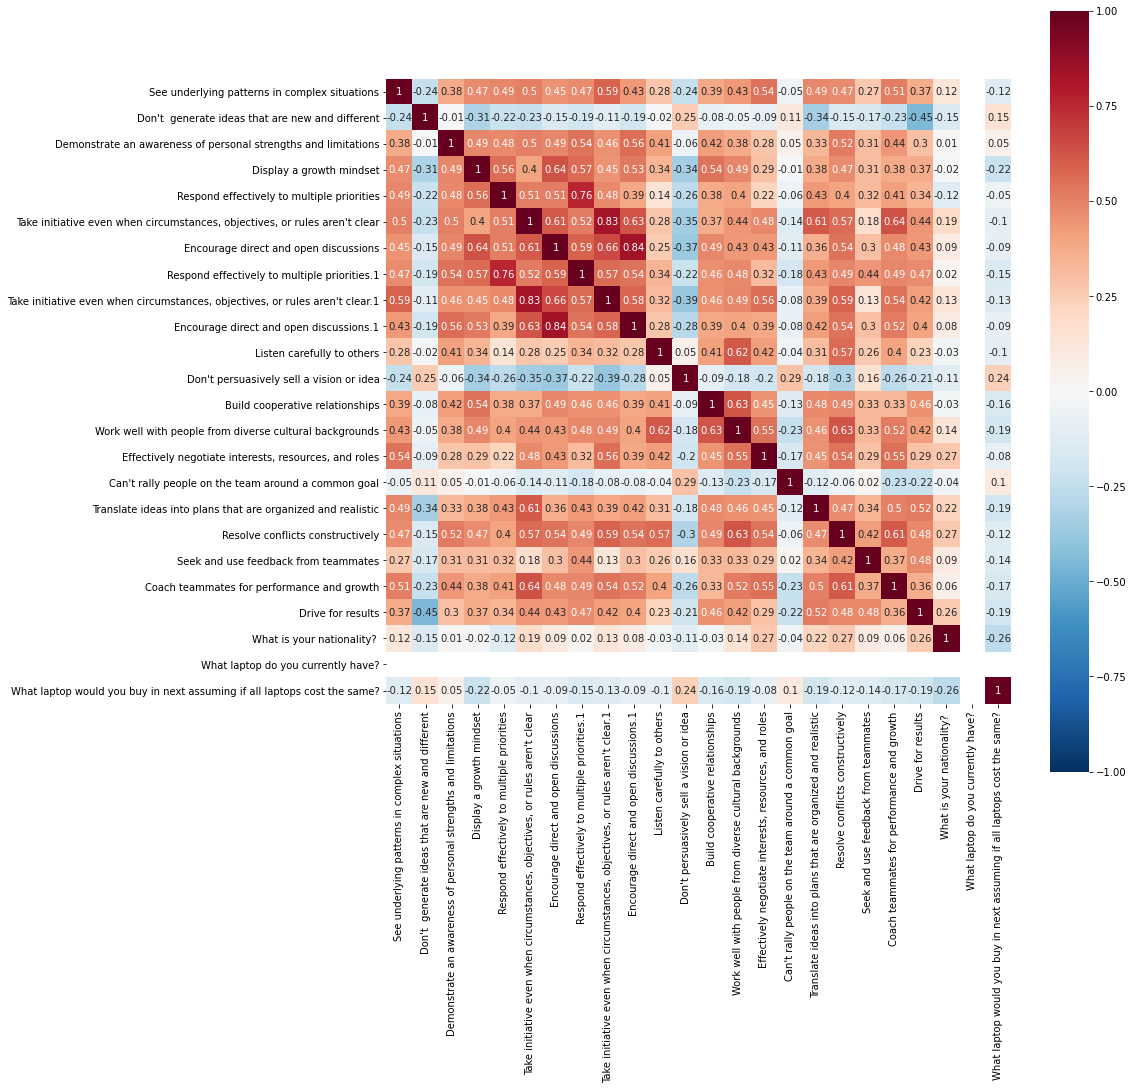

In [11]:
# correlation heatmap for "Hult DNA"
fig, ax = plt.subplots(figsize=(14, 14))
df_hultdna_corr = \
    df_hultdna.corr(method="pearson").round(2)

sns.heatmap(data=df_hultdna_corr,
            cmap='RdBu_r',
            vmin=-1.0, vmax=1.0,
            square=True, annot=True)
plt.show()

<div style="margin: 1.0em 0 0em 0; padding-right: 2em;">
    
<h4 style="color: ">3.3&nbsp;&nbsp; PCA on "Big Five"</h4>
<p style="text-align: justify">
    We extract <em>principle components</em> from the Big Five dataframe by applying the scikit-learn PCA routine,
</p>
</div>

In [12]:
from sklearn.decomposition import PCA

## PCA - "Big Five"
#
pca          = PCA(n_components=None, random_state=802) # no limit to principal components
bigfive_pca  = pca.fit_transform(df_bigfive)
print("[\"Big Five\"]")
print("[Original shape: "+str(df_bigfive.shape)+"]")
print("[     PCA shape: "+str(bigfive_pca.shape)+"]\n")

# for each principle component
component_number    = 0
cumulative_variance = 0.0
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"\tPC {component_number}: {variance.round(3)}".expandtabs(3))
    cumulative_variance += variance

["Big Five"]
[Original shape: (69, 7)]
[     PCA shape: (69, 7)]

   PC 1: 0.328
   PC 2: 0.235
   PC 3: 0.176
   PC 4: 0.148
   PC 5: 0.094
   PC 6: 0.019
   PC 7: 0.0


<div style="margin: .0em 0 0em 0; padding-right: 2em;"> 
<p style="text-align: justify">
Having examined the principle components, especially the top ones (PC 1 to PC 4), and the associated varaicne ratio they each explains for the model, we apply a customized function to draw a <em>scree plot</em> of them on variance values; the scree plot proposed by Cattell in 1996 is a line plot that draws the eigenvalues of principla components, and it determines the significant principal components<sup>&nbsp;[<a href="#scree">5</a>].</sup>
</p>
</div>

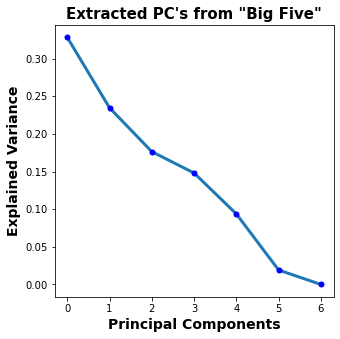

In [13]:
def scree_plot(pca_object, export=False, title="Scree Plot"):
    
    # (helper function credit: Professor Chase Kusterer)
    #
    fig, ax  = plt.subplots(figsize=(5, 5))
    features = range(pca_object.n_components_)
    
    plt.plot(features, pca_object.explained_variance_ratio_,
             linewidth=3, marker='o', markersize=5,
             markeredgecolor='blue', markerfacecolor='blue')

    # options and display
    plt.title(title, fontweight="bold", fontsize=15.0)
    plt.xlabel("Principal Components", fontweight="bold", fontsize=14.0)
    plt.ylabel("Explained Variance", fontweight="bold", fontsize=14.0)
    plt.xticks(features)
    plt.show()

# draw scree plot (Big Five)
scree_plot(pca_object=pca, title="Extracted PC's from \"Big Five\"")

In [14]:
# "Big Five": get principle components and build
# correlation matrix for PC's vs. column features
#

# transpose PC's
bigfive_factor_loadings_df = \
    pd.DataFrame(np.transpose(pca.components_))

# name the rows
bigfive_factor_loadings_df = \
    bigfive_factor_loadings_df.set_index(df_bigfive.columns)

# print and save to Excel
print(bigfive_factor_loadings_df.head())
bigfive_factor_loadings_df.to_excel("./bigfive_factor_loadings.xlsx")

                          0         1         2         3         4         5  \
Extroversion      -0.490826  0.496007  0.118409  0.566719  0.416234 -0.068010   
Agreeableness     -0.290933  0.156384 -0.888027  0.020210 -0.313849 -0.058316   
Conscientiousness -0.388712 -0.785775 -0.166795  0.055114  0.447544 -0.017533   
Neuroticism       -0.474372  0.263693  0.115768 -0.809043  0.193346 -0.010102   
Openness          -0.540137 -0.204775  0.393880  0.139374 -0.700393 -0.034674   

                     6  
Extroversion       0.0  
Agreeableness      0.0  
Conscientiousness  0.0  
Neuroticism        0.0  
Openness           0.0  


<div style="margin: .0em 0 0em 0; padding-right: 2em;">
    
<p style="text-align: justify">Through the results illustrated above, we find for Macbook (Apple) users,
    <ul>
        <li><b>Insight #1:&nbsp;</b> They are likely to be <b>emotional-and-sociable extroverts</b>. They have high positive loading for Extroversion, Neuroticism and Agreeableness.</li>
        <li style="margin-top: .7em"><b>Insight #2:&nbsp;</b> They have high negative loadings for conscientiousness, and low negative loading on openness meaning Macbook users may be highly messy people. Also, they are more likely to be <b>traditional people who do not seek new experiences</b>.</li>
    </ul>
</p>

</div>

<div style="margin: .5em 0 0em 0; padding-right: 2em;">
    
<h4 style="color: ">3.4&nbsp;&nbsp; PCA on "Hult DNA"</h4>
<p style="text-align: justify">
    In the same approach with PCA routine from scikit-learn, we perform it on Hult DNA columns and observe the resulting principle components,
</p>
</div>

["Hult DNA"]
[Original shape: (69, 24)]
[     PCA shape: (69, 10)]

   PC 1: 0.398
   PC 2: 0.081
   PC 3: 0.072
   PC 4: 0.065
   PC 5: 0.055
   PC 6: 0.041
   PC 7: 0.039
   PC 8: 0.035
   PC 9: 0.03
   PC 10: 0.03


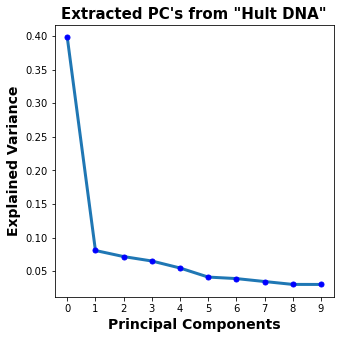

In [15]:
## PCA - "Hult DNA"
#
pca          = PCA(n_components=10, random_state=802) # no limit to principal components
hultdna_pca  = pca.fit_transform(df_hultdna)
print("[\"Hult DNA\"]")
print("[Original shape: "+str(df_hultdna.shape)+"]")
print("[     PCA shape: "+str(hultdna_pca.shape)+"]\n")

# for each principle component
component_number    = 0
cumulative_variance = 0.0
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"\tPC {component_number}: {variance.round(3)}".expandtabs(3))
    cumulative_variance += variance

# draw scree plot (Big Five)
scree_plot(pca_object=pca, title="Extracted PC's from \"Hult DNA\"")

<div style="margin: .5em 0 0em 0; padding-right: 2em;">
<p style="text-align: justify">We choose to re-code the Hult DNA columns (questions) into three "subgroups", <em>think</em>, <em>inluence</em>, and <em>team</em> based on their definitions, as illustrated below:</p>
</div>

In [16]:
# group columns with Hult DNA feature "think"
#
sum_cols = df_hultdna['See underlying patterns in complex situations'] - \
    df_hultdna['Don\'t  generate ideas that are new and different'] + \
    df_hultdna['Demonstrate an awareness of personal strengths and limitations'] + \
    df_hultdna['Display a growth mindset'] + \
    df_hultdna['Respond effectively to multiple priorities'] + \
    df_hultdna['Take initiative even when circumstances, objectives, or rules aren\'t clear']

df_hultdna['think'] = sum_cols
df_hultdna['think'] = df_hultdna['think'].div(6).round(2)
print(df_hultdna['think'])

0      0.03
4     -0.72
5     -0.37
8     -0.46
10    -0.58
       ... 
126    0.08
131    0.39
132    0.65
135    0.40
136    0.18
Name: think, Length: 69, dtype: float64


In [17]:
# group columns with Hult DNA feature "influence"
sum_cols_2 = df_hultdna['Encourage direct and open discussions'] + \
    df_hultdna['Listen carefully to others'] - \
    df_hultdna['Don\'t persuasively sell a vision or idea'] + \
    df_hultdna['Build cooperative relationships'] + \
    df_hultdna['Work well with people from diverse cultural backgrounds'] + \
    df_hultdna['Effectively negotiate interests, resources, and roles']

df_hultdna['influence'] = sum_cols_2
df_hultdna['influence'] = df_hultdna['influence'].div(6).round(2)
print(df_hultdna['influence'])

0     -0.12
4     -0.96
5     -0.94
8     -0.12
10     0.09
       ... 
126   -1.15
131    0.56
132    0.83
135   -1.03
136   -0.36
Name: influence, Length: 69, dtype: float64


In [18]:
# group columns with Hult DNA feature "team"
sum_cols_3 = df_hultdna['Translate ideas into plans that are organized and realistic'] + \
    df_hultdna['Resolve conflicts constructively'] + \
    df_hultdna['Seek and use feedback from teammates'] + \
    df_hultdna['Coach teammates for performance and growth'] + \
    df_hultdna['Drive for results'] - \
    df_hultdna['Can\'t rally people on the team around a common goal']

df_hultdna['team'] = sum_cols_3
df_hultdna['team'] = df_hultdna['team'].div(6).round(2)
print(df_hultdna['team'])

0      0.10
4     -1.27
5     -0.32
8      0.10
10     0.10
       ... 
126   -0.42
131    0.52
132    0.72
135   -0.37
136   -0.73
Name: team, Length: 69, dtype: float64


In [19]:
# creat a new df with only Hult DNA groups and response varibales
df_hultdna_group= df_hultdna[["think", "influence", "team",
                              "What laptop do you currently have?",
                              "What laptop would you buy in next assuming if all laptops cost the same?"]]
df_hultdna_group.head(2) # check result

,think,influence,team,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?
0,0.03,-0.12,0.10,1,1
4,-0.72,-0.96,-1.27,1,2


Original shape: (69, 5)
PCA shape     : (69, 5)
PC 1: 0.749
PC 2: 0.1
PC 3: 0.082
PC 4: 0.068
PC 5: 0.0


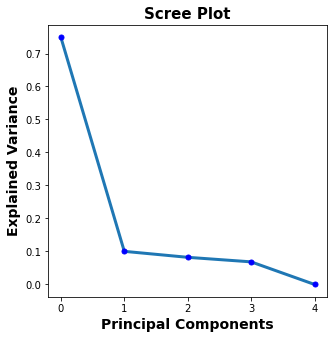

In [20]:
from sklearn.decomposition import PCA

## PCA - "Hult DNA Groups"
#
pca               = PCA(n_components=None, random_state=802) # no limit to PC's
hultdna_group_pca = pca.fit_transform(df_hultdna_group)
print("Original shape:", df_hultdna_group.shape)             # compare dimensions
print("PCA shape     :", hultdna_group_pca.shape)

# for each principle component
component_number    = 0
cumulative_variance = 0.0
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")
    cumulative_variance += variance
    
# draw a scree plot
pca.explained_variance_ratio_
scree_plot(pca_object=pca)

In [21]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_))

# naming rows as original features
factor_loadings_df_hultdna_group = factor_loadings_df.set_index(df_hultdna_group.columns)

print(factor_loadings_df_hultdna_group) # check result

# saving to Excel
factor_loadings_df_hultdna_group.to_excel("./hultdna_group_factor_loadings.xlsx")

                                                           0         1  \
think                                              -0.577200 -0.787831   
influence                                          -0.577831  0.434876   
team                                               -0.572172  0.316424   
What laptop do you currently have?                  0.000000 -0.000000   
What laptop would you buy in next assuming if a...  0.074641 -0.300135   

                                                           2         3    4  
think                                               0.024111 -0.213498 -0.0  
influence                                           0.689743  0.035343 -0.0  
team                                               -0.694253  0.300844 -0.0  
What laptop do you currently have?                 -0.000000  0.000000 -1.0  
What laptop would you buy in next assuming if a...  0.204169  0.928796 -0.0  


<div style="margin: 1em 0 0em 0; padding-right: 2em;">

<p style="text-align: justify">According to the PCA and as the analysis suggests, Mac users have high negative loading in thinking and high positive loading on influence, which means the following:</p>

<p style="text-align: justify">
<b>Insight #3:</b><br>
1-	Mac users are unlikely to see underlying patterns in complex situations;<br>
2-	Don’t generate ideas that are new and different;<br>
3-	Don’t demonstrate an awareness of personal strength and limitation;<br>
4-	Don’t display growth mindset;<br>
5-	Don’t respond effectively to multiple priorities;<br>
6-	Don’t take initiative even when circumstances, objectives, or rules aren't clear;<br>
</p>

<p style="text-align: justify">In terms of the high positive loading on influence, Mac users have the following qualities:</p>


<p style="text-align: justify">
<b>Insight #4:</b><br>
1-	Encourage direct and open discussions;<br>
2-	Listen carefully to others;<br>
3-	Build cooperative relationships;<br>
4-	Work well with people from diverse cultural backgrounds;<br>
5-	Effectively negotiate interests, resources, and roles;<br>
</p>


<div style="margin: 2.5em 0 0em 0; padding-right: 2em;">
<h3>4&nbsp;&nbsp; Conclusion</h3>

<p style="text-align: justify">In this study, our team is commissioned to perform an open-ended marketing analysis based on the psychological survey conducted on laptop computer customers. By examining the dataset in details and focusing on the current Apple customers, we made findings statistically along the process and suggested insights that could be helpful for the Apple company on future marketing strategies.</p>
    
<p style="text-align: justify">
In order for Apple to increase its market share in the customer market and in the enterprises market, there is no need to focus only on the design and the product road mapping. In fact, Apple team must <b>walk backward and go through the customer experience/journey</b> and see what the market needs, and, from the above insight, we recommend Apple marketing team to conduct their tactical campaigns and approach customers under Insight #4. &nbsp;In the future, we envision that good marketing/data collection will in turn boost data analysts to come up with further and better business insights.</p>

</div>

<div style="margin: 3em 0 1em 0; padding-right: 2em; color: ; font-size: ">
<h3>References</h3>

<p id="bigfive" style="text-align: justify; word-break: break-all; margin-top: 1.5em">[1]&nbsp; Goldberg, Lewis R. "The development of markers for the Big-Five factor structure." Psychological assessment 4.1 (1992): 26 &nbsp;Retrieved from <a href="https://doi.apa.org/doiLanding?doi=10.1037/1040-3590.4.1.26" style="color: #333">https://doi.apa.org/doiLanding?doi=10.1037/1040-3590.4.1.26</a></p>

<p id="assessment" style="text-align: justify; word-break: break-all">[2]&nbsp; Recreational Therapy Assessment,&nbsp; Assessment Tools.&nbsp; Retrieved from <a href="https://sites.temple.edu/rtassessment/njepatra-conference/" style="color: #333">https://sites.temple.edu/rtassessment/njepatra-conference/</a></p>
<p id="BFPT" style="text-align: justify; word-break: break-all">[3]&nbsp; The Big Five Personality Test.&nbsp; Retrieved from <a href="https://openpsychometrics.org/printable/big-five-personality-test.pdf" style="color: #333">https://openpsychometrics.org/printable/big-five-personality-test.pdf</a></p>
<p id="bigfive2" style="text-align: justify; word-break: break-all">[4]&nbsp; Verywell Mind,&nbsp; The Big Five Personality Traits.&nbsp; Retrieved from <a href="https://www.verywellmind.com/the-big-five-personality-dimensions-2795422" style="color: #333">https://www.verywellmind.com/the-big-five-personality-dimensions-2795422</a></p>
<p id="scree" style="text-align: justify; word-break: break-all">[5]&nbsp; Wikipedia,&nbsp; Scree Plot.&nbsp; Retrieved from <a href="http://en.wikipedia.org/wiki/Scree_plot" style="color: #333">http://en.wikipedia.org/wiki/Scree_plot</a></p>

<!--<p id="x" style="text-align: justify; word-break: break-all">[6]&nbsp; ...</p>
<p id="x" style="text-align: justify; word-break: break-all">[7]&nbsp; ...</p>
<p id="x" style="text-align: justify; word-break: break-all">[8]&nbsp; ...</p>-->
</div>

<div style="margin: 0 0 0em 0; padding-right: 2em">
   
   <div style="font-size: 89%">
      <hr style="color: black; display: block; height: 1px; border: ; margin-bottom: .6em">
      &nbsp;&nbsp;Copytright © 2021 &nbsp; All Rights Reserved. <span style="float: right">Hult International Business School, Hult San Francisco&nbsp;&nbsp;</span>
   </div>
</div>